# Análise da base de dados da AppleStore

base de dados: https://www.kaggle.com/datasets/calibr3io/applestore

## Sobre as colunas (características)

Este dataset contém 16 colunas (características)

1. id: Id do aplicativo
2. track_name: Nome do aplicativo
3. size_bytes: Tamanho do aplicativo
4. currency: O tipo de moeda (se for pago)
5. price: O preço do aplicativo (se tiver)
6. rating_count_tot: O rating total de todas as versões do aplicativo
7. rating_count_ver: O rating atual da última versão do aplicativo
8. user_rating: O rating médio de todos as versões do aplicativo
9. user_rating_ver: O rating médio atual da última versão do aplicativo
10. ver: Versão atual do aplicativo
11. cont_rating: Classificação do aplicativo
12. prime_genre: Gênero do aplicativo
13. sup_devices.num: Quantidade de celulares Apple que suporta este aplicativo
14. ipadSc_urls.num: Número de screenshots do aplicativo disponíveis para iPad
15. lang.num: Número de idiomas suportados pelo aplicativo
16. vpp_lic:  Indica se o aplicativo possui licenciamento do Volume Purchase Program (VPP)

## Pipeline

1. Coleta de dados
2. Limpando dados
3. Análise exploratória
4. Modelagem estatística

In [364]:
import warnings

# Desativar todos os warnings
warnings.filterwarnings('ignore')

## 1. Coleta de dados

In [349]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Projetos/Data/datasets para estudar/AppleStore.csv')

data.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [350]:
# Aqui conseguimos ver melhor os tipos de dados e se há dados faltantes
# E neste caso não há dados faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

## 2. Limpando dados

Uma limpeza inicial que podemos fazer é remover a coluna 'currency' que não é tão importante para análise, já que todos o preço de todos os aplicativos nesta base de dados está em dolar.

In [351]:
# Analisando a frequência
data['currency'].describe()

count     7197
unique       1
top        USD
freq      7197
Name: currency, dtype: object

In [352]:
data.drop(['currency'], axis=1, inplace=True)

Outra coluna que também não nos fará falta nesta análise é o 'id'.

In [353]:
data.drop(['id'], axis=1, inplace=True)

In [354]:
data.head(5)

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,Facebook,389879808,0.0,2974676,212,3.5,3.5,95,4+,Social Networking,37,1,29,1
1,Instagram,113954816,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,Clash of Clans,116476928,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,Temple Run,65921024,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,Pandora - Music & Radio,130242560,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


## 3. Análise Exploratória

### Nesta análise eu irei extrair apenas 4 informações, mas poderia extrair mais.

### Pergunta nº1: Quais são os gêneros e suas frequências?

In [355]:
# importando o pacote que usaremos para visualizar os dados
import matplotlib.pyplot as plt

E antes de responder a pergunta nº1 precisamos saber quais são todos os gêneros que temos na nossa base de dados e suas frequências.

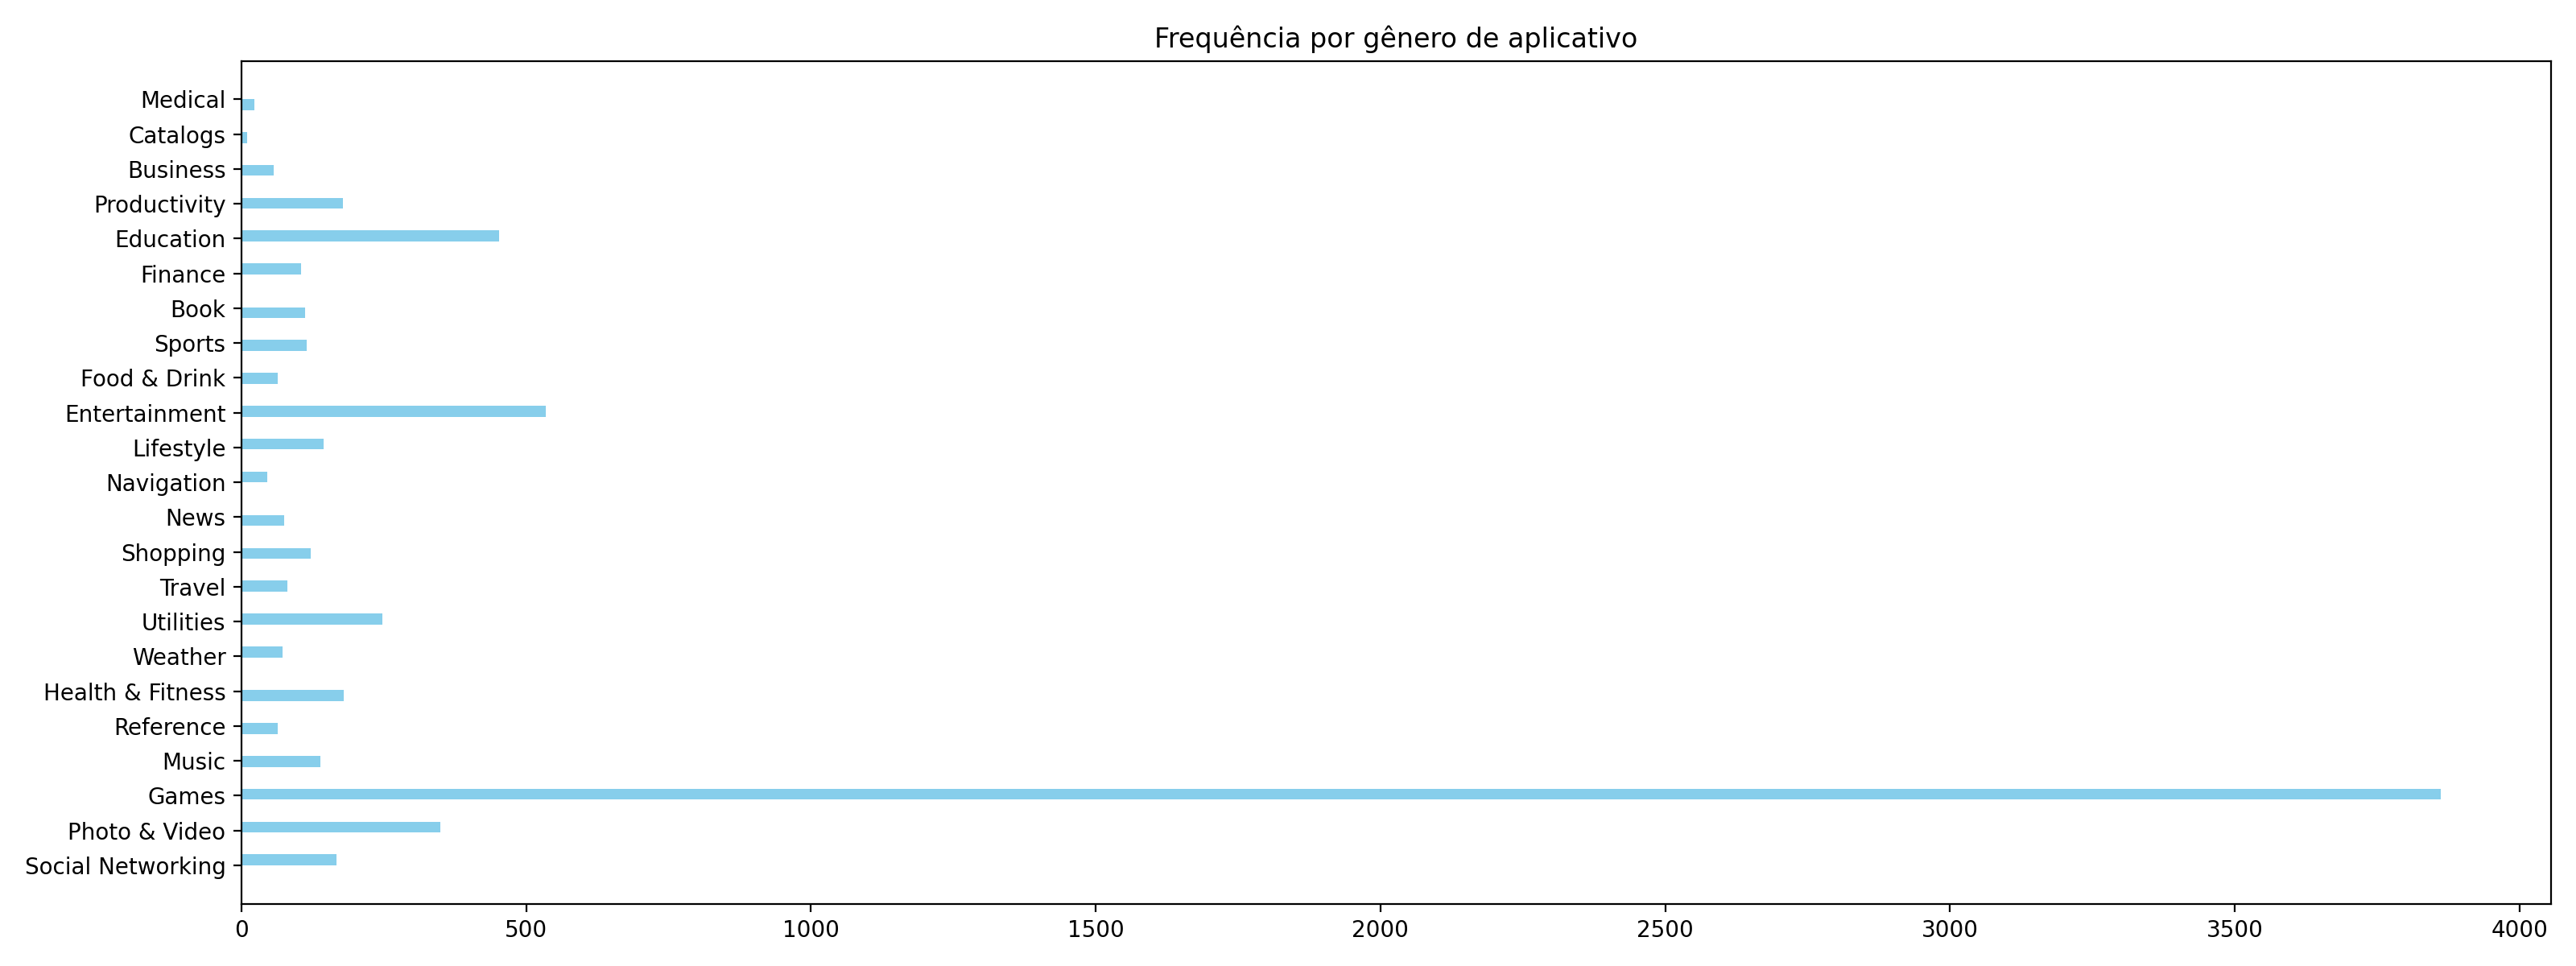

In [356]:
genre = data['prime_genre']
plt.figure(figsize=(16, 6))
plt.hist(genre, bins=70, color='skyblue', orientation='horizontal')
plt.title("Frequência por gênero de aplicativo")
plt.tight_layout()
plt.show()

In [357]:
qtd_genre = genre.value_counts()

print(qtd_genre)

prime_genre
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: count, dtype: int64


### Pergunta nº2: Qual gênero tem mais avaliação?

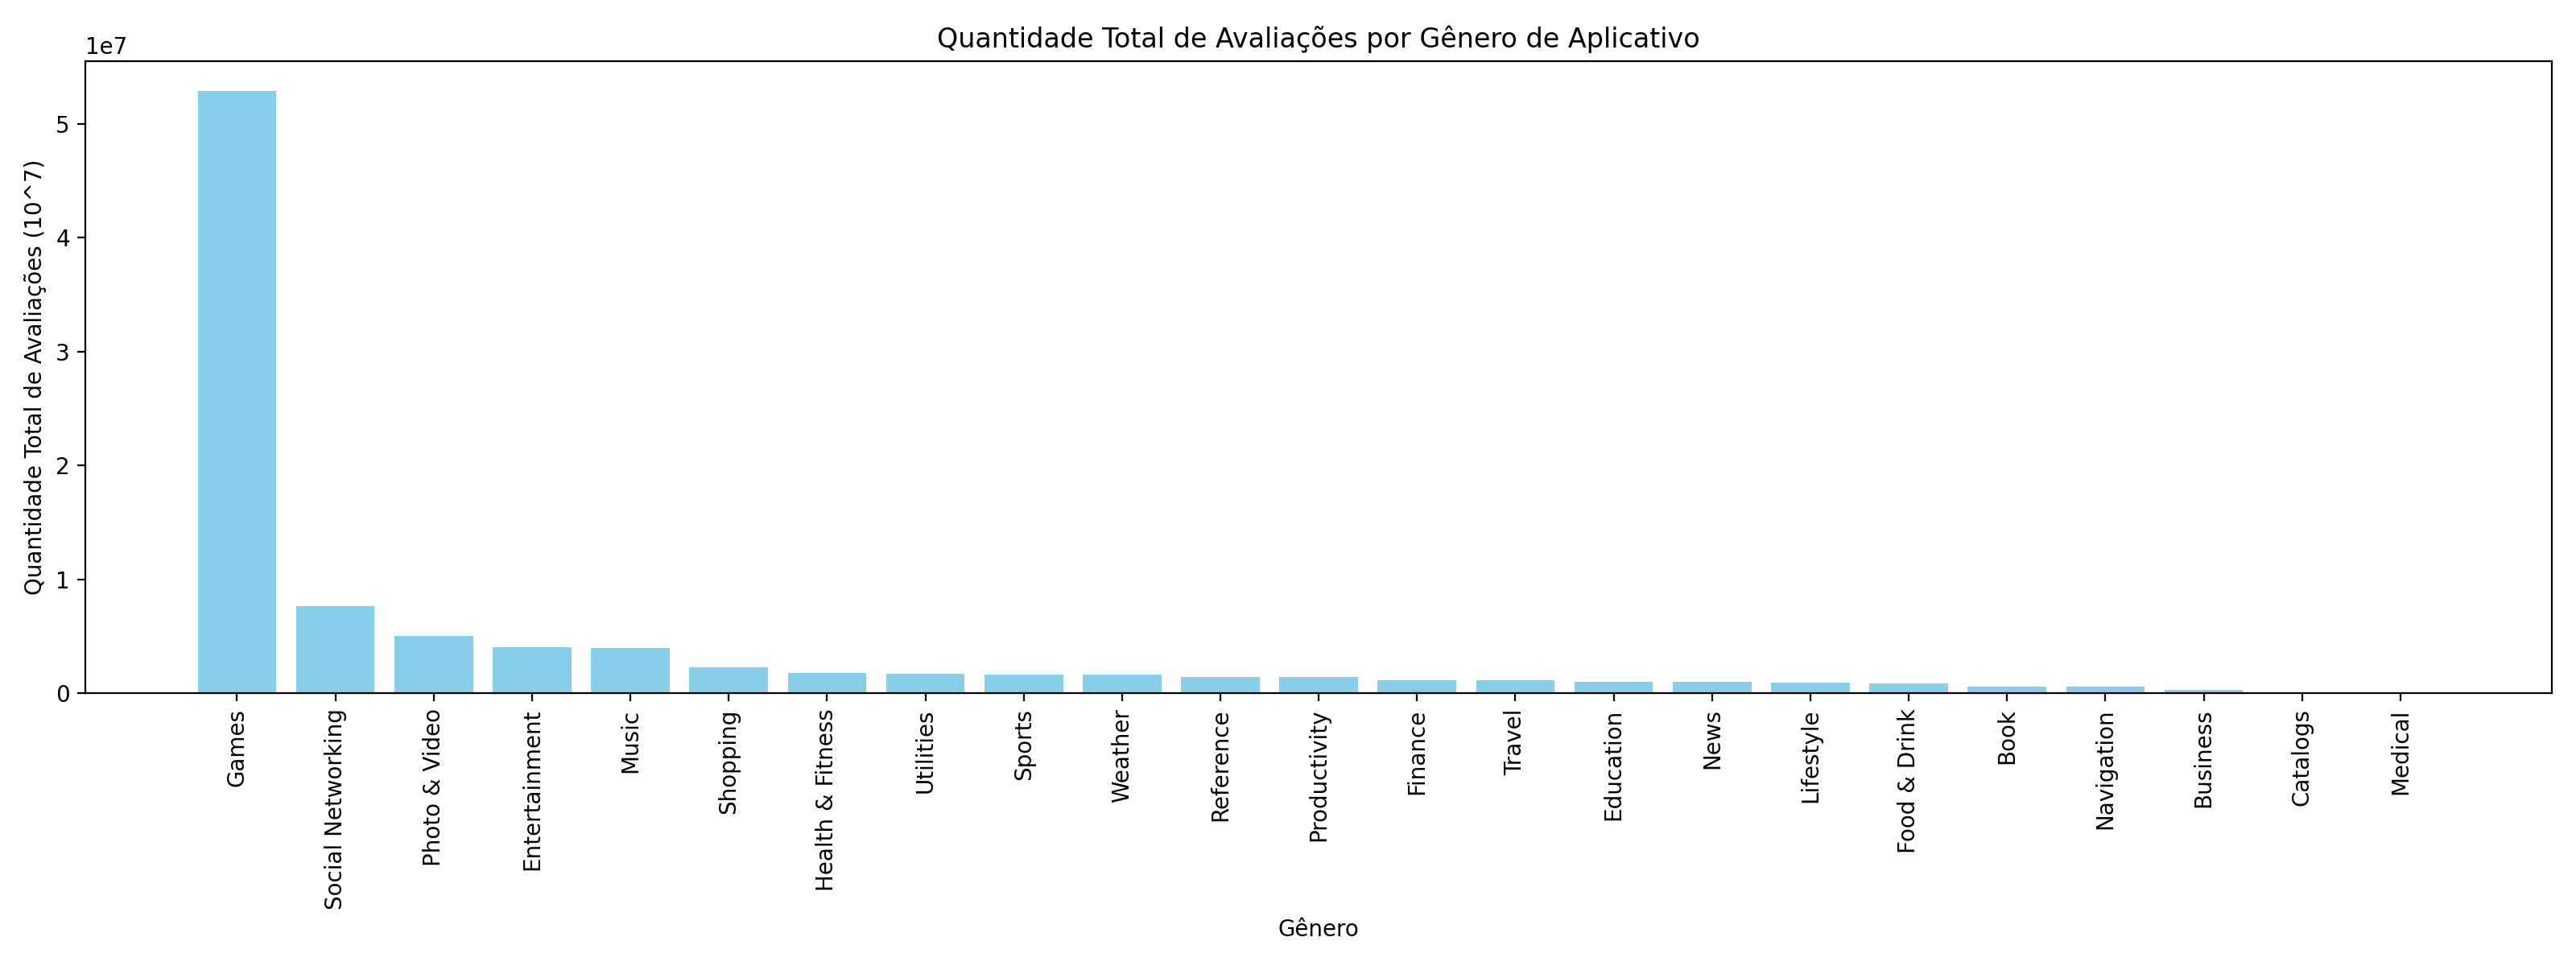

In [358]:
genre_ratings = data.groupby('prime_genre')['rating_count_tot'].sum().reset_index()


genre_ratings = genre_ratings.sort_values(by='rating_count_tot', ascending=False)


plt.figure(figsize=(16, 6))
plt.bar(genre_ratings['prime_genre'], genre_ratings['rating_count_tot'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Gênero')
plt.ylabel('Quantidade Total de Avaliações (10^7)')
plt.title('Quantidade Total de Avaliações por Gênero de Aplicativo')
plt.tight_layout()
plt.show()

In [359]:
print(genre_ratings)

          prime_genre  rating_count_tot
7               Games          52878491
18  Social Networking           7598316
14      Photo & Video           5008946
4       Entertainment           4030518
11              Music           3980199
17           Shopping           2271070
8    Health & Fitness           1784371
21          Utilities           1702228
19             Sports           1599070
22            Weather           1597034
16          Reference           1434294
15       Productivity           1433136
5             Finance           1148956
20             Travel           1144485
3           Education           1014371
13               News            976130
9           Lifestyle            887294
6        Food & Drink            878133
0                Book            574049
12         Navigation            545282
1            Business            272921
2            Catalogs             17325
10            Medical             13634


### Pergunta nº3: Qual é classificação de idade que mais predomina na Apple Store?

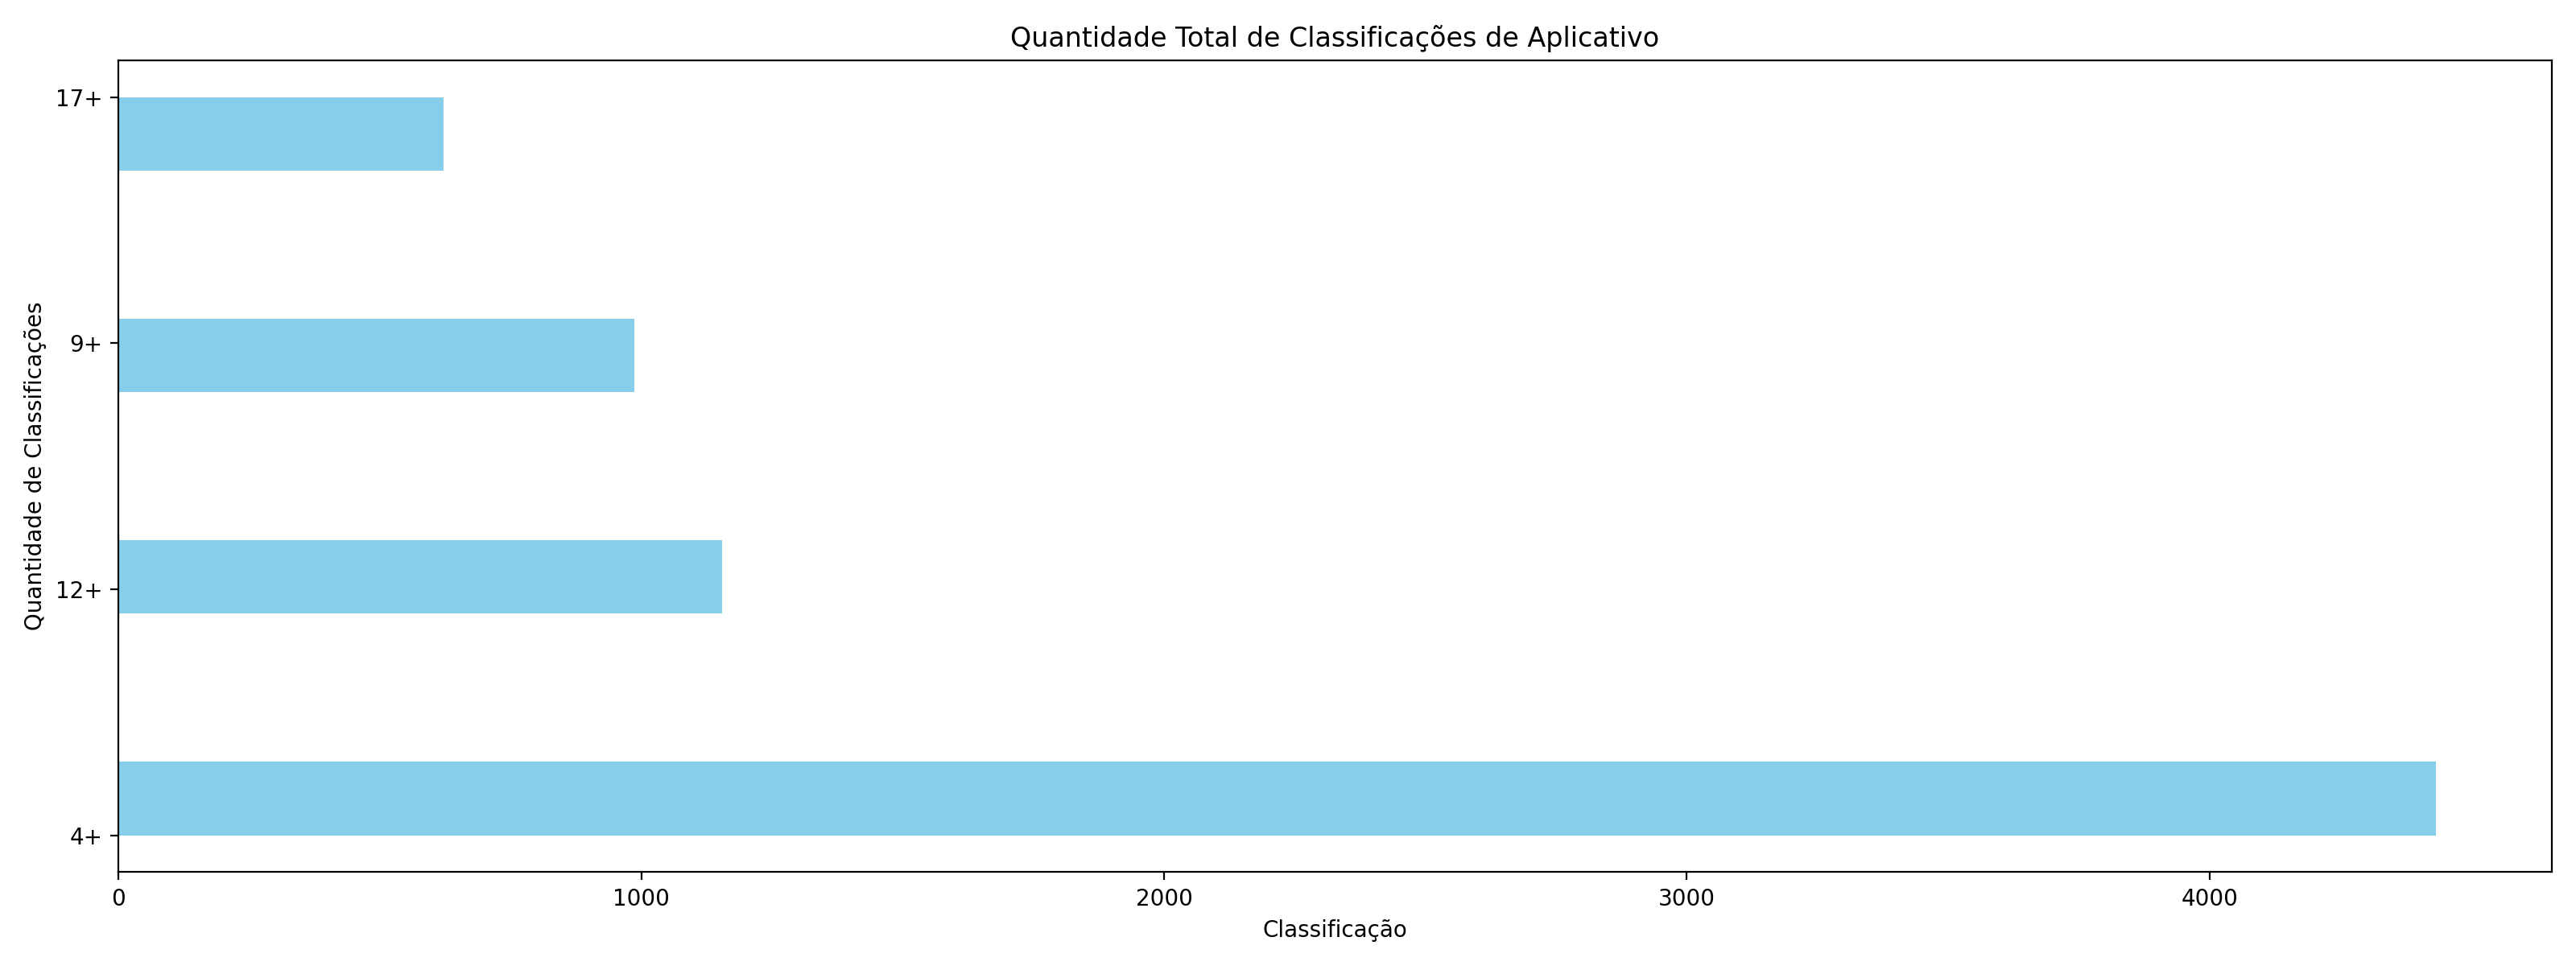

In [360]:
plt.figure(figsize=(16, 6))
plt.hist(data['cont_rating'], color='skyblue', orientation='horizontal')
plt.xlabel('Classificação')
plt.ylabel('Quantidade de Classificações')
plt.title('Quantidade Total de Classificações de Aplicativo')
plt.tight_layout()

In [361]:
print(data['cont_rating'].value_counts())

cont_rating
4+     4433
12+    1155
9+      987
17+     622
Name: count, dtype: int64


E a reposta que responde a Pergunta nº3 é 4 anos ou mais.

### Pergunta nº4: Tem mais aplicativo pago ou gratuito?

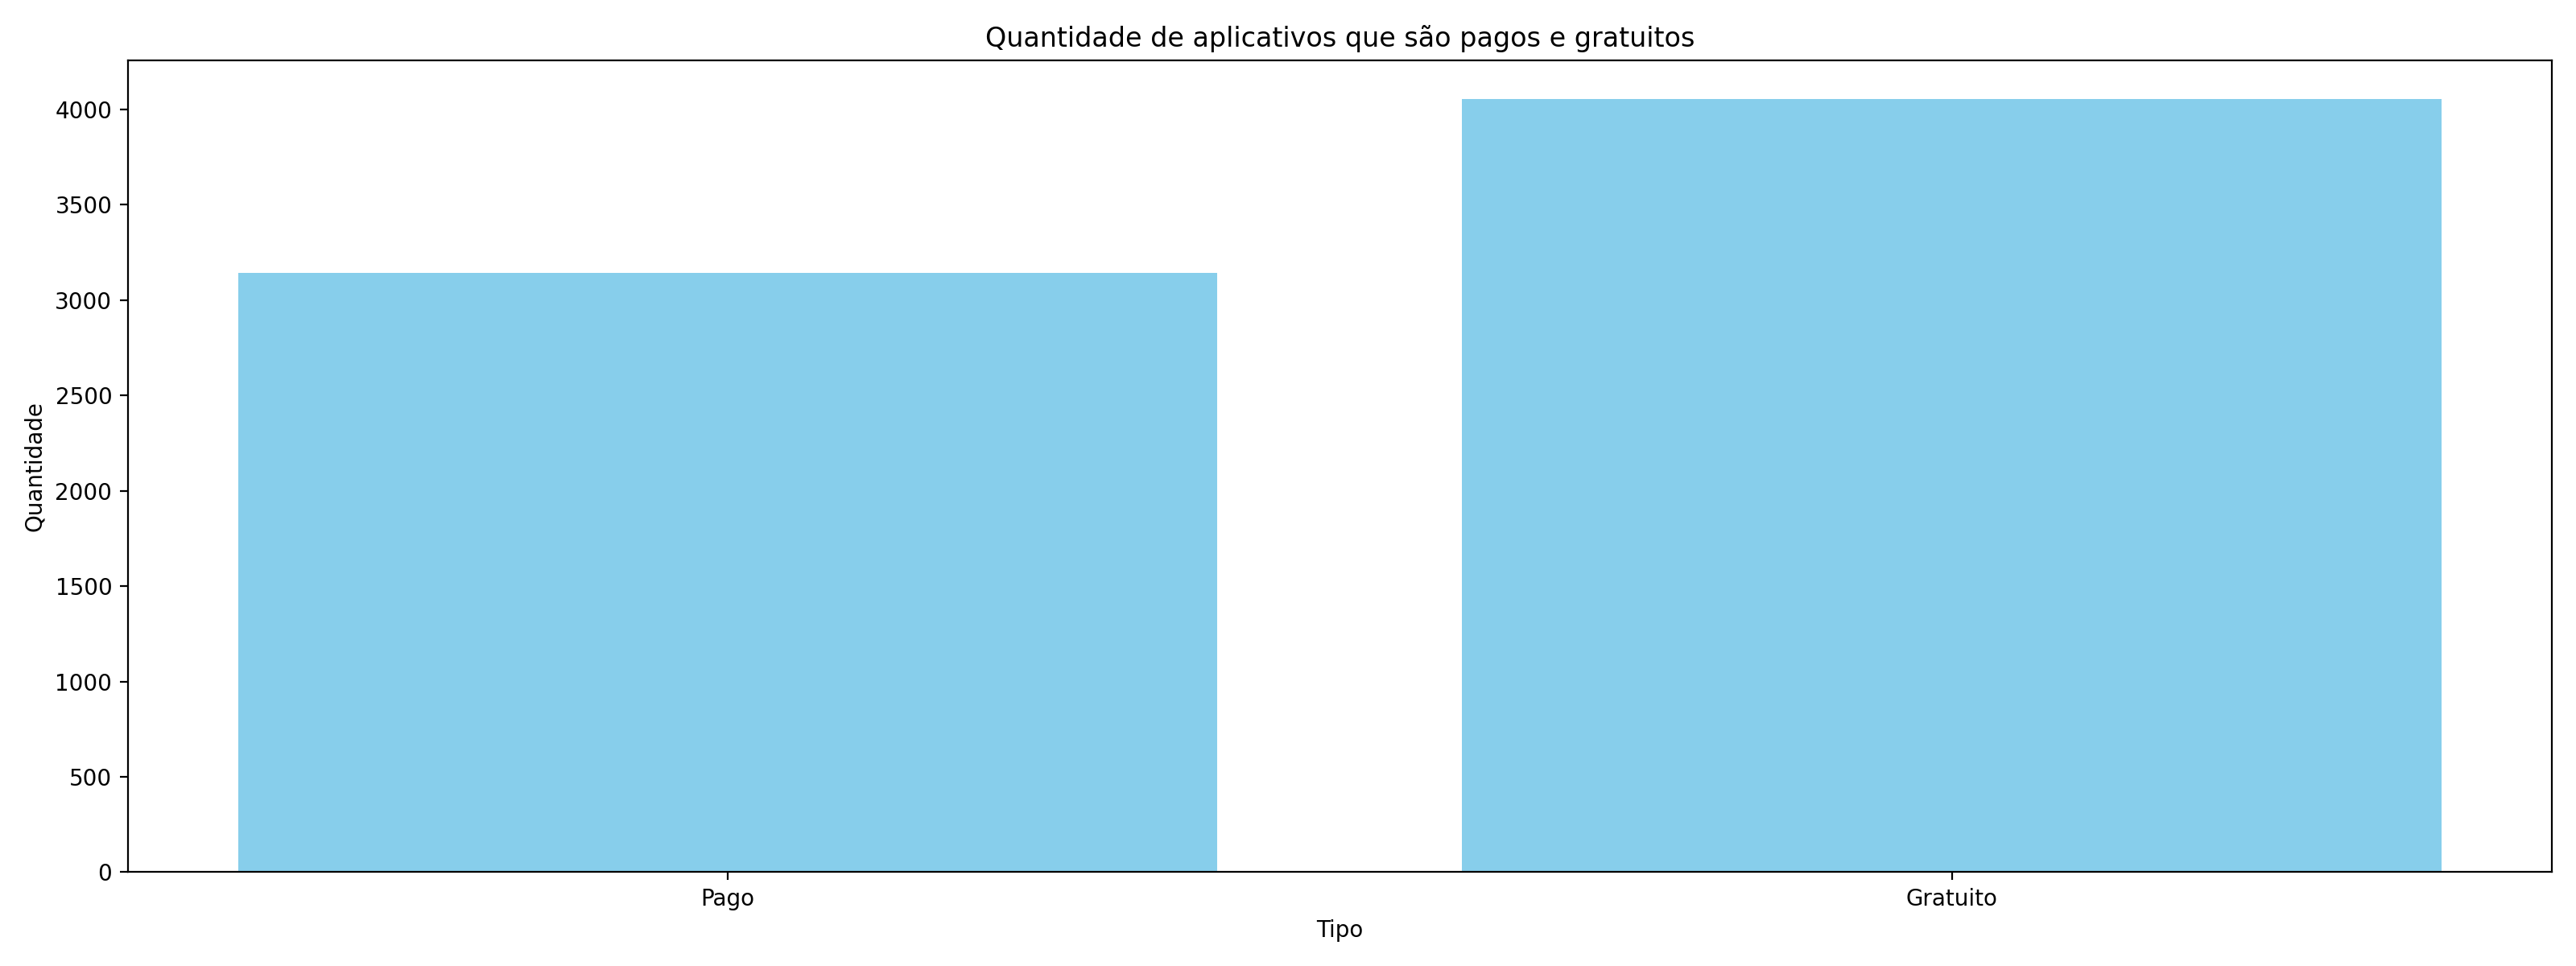

In [363]:
qtd_pago = len(data[data['price'] > 0])
qtd_livre = len(data[data['price'] == 0])

df_valores = pd.DataFrame({'Tipo': ["Pago", "Gratuito"], 'Valores': [qtd_pago, qtd_livre]})

plt.figure(figsize=(16, 6))
plt.bar(df_valores['Tipo'], df_valores['Valores'], color='skyblue')
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.title('Quantidade de aplicativos que são pagos e gratuitos')
plt.tight_layout()

## 4. Modelagem estatística

### Pipeline

1. Pré-processamento
2. Machine Learning

### 4.1. Pré-processamento

In [402]:
data_ml = data[['price', 'cont_rating', 'prime_genre', 'sup_devices.num', 'lang.num', 'rating_count_tot', 'vpp_lic', 'ipadSc_urls.num']]
data_ml

,price,cont_rating,prime_genre,sup_devices.num,lang.num,rating_count_tot,vpp_lic,ipadSc_urls.num
0,0.0,4+,Social Networking,37,29,2974676,1,1
1,0.0,12+,Photo & Video,37,29,2161558,1,0
2,0.0,9+,Games,38,18,2130805,1,5
3,0.0,9+,Games,40,1,1724546,1,5
4,0.0,12+,Music,37,1,1126879,1,4
...,...,...,...,...,...,...,...,...
7192,0.0,4+,Games,38,1,0,1,5
7193,0.0,9+,Book,38,1,0,1,0
7194,0.0,12+,Games,37,2,0,1,2
7195,0.0,12+,Entertainment,40,1,0,1,0


In [403]:
# Aqui os dados são numéricos e em dolar. Não se precisa pre-processar nada

data_ml['price'].describe()

count    7197.000000
mean        1.726218
std         5.833006
min         0.000000
25%         0.000000
50%         0.000000
75%         1.990000
max       299.990000
Name: price, dtype: float64

In [404]:
# Aqui os dados são categóricos. Precisamos pré-processar

print('Antes do pré-processamento')
print(data_ml['cont_rating'].describe())

data_ml['cont_rating'].describe()

tags = data_ml['cont_rating'].unique()

for i, tag in enumerate(tags):
  data_ml['cont_rating'] = data_ml['cont_rating'].replace(tag, i)

print('\nDepois do pré-processamento')
print(data_ml['prime_genre'].describe())

Antes do pré-processamento
count     7197
unique       4
top         4+
freq      4433
Name: cont_rating, dtype: object

Depois do pré-processamento
count      7197
unique       23
top       Games
freq       3862
Name: prime_genre, dtype: object


In [405]:
# Aqui os dados são categóricos. Precisamos pré-processar

print('Antes do pré-processamento')
print(data_ml['prime_genre'].describe())

tags = data_ml['prime_genre'].unique()

for i, tag in enumerate(tags):
  data_ml['prime_genre'] = data_ml['prime_genre'].replace(tag, i)

print('\nDepois do pré-processamento')
print(data_ml['prime_genre'].describe())

Antes do pré-processamento
count      7197
unique       23
top       Games
freq       3862
Name: prime_genre, dtype: object

Depois do pré-processamento
count    7197.000000
mean        5.980270
std         6.071846
min         0.000000
25%         2.000000
50%         2.000000
75%        11.000000
max        22.000000
Name: prime_genre, dtype: float64


In [406]:
# Aqui os dados são numéricos. Não se precisa pre-processar nada

data_ml['sup_devices.num'].describe()

count    7197.000000
mean       37.361817
std         3.737715
min         9.000000
25%        37.000000
50%        37.000000
75%        38.000000
max        47.000000
Name: sup_devices.num, dtype: float64

In [407]:
# Aqui os dados são numéricos. Não se precisa pre-processar nada

data_ml['lang.num'].describe()

count    7197.000000
mean        5.434903
std         7.919593
min         0.000000
25%         1.000000
50%         1.000000
75%         8.000000
max        75.000000
Name: lang.num, dtype: float64

In [408]:
# Fazer a nova visualização com os dados já pré-processados

data_ml

,price,cont_rating,prime_genre,sup_devices.num,lang.num,rating_count_tot,vpp_lic,ipadSc_urls.num
0,0.0,0,0,37,29,2974676,1,1
1,0.0,1,1,37,29,2161558,1,0
2,0.0,2,2,38,18,2130805,1,5
3,0.0,2,2,40,1,1724546,1,5
4,0.0,1,3,37,1,1126879,1,4
...,...,...,...,...,...,...,...,...
7192,0.0,0,2,38,1,0,1,5
7193,0.0,2,16,38,1,0,1,0
7194,0.0,1,2,37,2,0,1,2
7195,0.0,1,13,40,1,0,1,0


### 4.2. Machine Learning

In [416]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [410]:
# Separando os dados entre X e Y

X = data_ml[['price', 'cont_rating', 'prime_genre', 'sup_devices.num', 'lang.num', 'vpp_lic', 'ipadSc_urls.num']]
y = data_ml[['rating_count_tot']]

In [411]:
# Transformando em uma mesma escala

std_s = StandardScaler()
X_scaled = std_s.fit_transform(X)

In [412]:
# Decompondo em 3 componentes

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [413]:
# Separando dados de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.7, random_state=42)

In [414]:
# Criando o modelo

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [415]:
# Avaliando o modelo

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(mse)

2620556000.4925084
